# Gear4 Code

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# Importing Libraries

In [0]:
import re
import scipy
import pickle 
import string
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
!pip install joblib
warnings.filterwarnings("ignore")
from joblib import dump, load
import matplotlib.pyplot as plt 
from sklearn.externals import joblib
from astropy.table import Table, Column
from sklearn.model_selection import KFold
from sklearn.feature_selection import chi2
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import *
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


# Importing Data

In [0]:

import pandas as pd
F = ['Gear1.xlsx','Gear2.xlsx','Gear3.xlsx','Gear4.xlsx','Gear5.xlsx','Gear6.xlsx','Gear7.xlsx','Gear8.xlsx','Gear9.xlsx','Gear10.xlsx','Gear11.xlsx','Gear12.xlsx','Gear13.xlsx','Gear14.xlsx','Gear15.xlsx','Gear16.xlsx','Gear17.xlsx','Gear18.xlsx','Gear19.xlsx','Gear20.xlsx','Gear21.xlsx','Gear22.xlsx','Gear23.xlsx','Gear24.xlsx','Gear25.xlsx']

path = []
path.append('/content/drive/My Drive/AML/Datasets/')
path.append(F[3])

p= ''.join(path)



print(""+str(p))


data=pd.read_excel(p)

#data=data.sample(frac=0.99, random_state=99)

/content/drive/My Drive/AML/Datasets/Gear4.xlsx


# Data Analysis

In [0]:
data = data.loc[:, (data != 0).any(axis=0)]

data.head()

MIC1        MIC2  MIC3        MIC4  ...  TEMP14     TEMP15  TEMP16  Class
0     0  -27.960340   0.0  -82.752294  ...       0  456.67634     0.0     32
1     0  108.019733   0.0  162.188415  ...       0  251.04381     0.0      3
2     0  -57.605177   0.0   -6.331184  ...       0  324.10470     0.0     23
3     0   33.896183   0.0 -155.695551  ...       0  303.41327     0.0     11
4     0    0.000000   0.0  -39.557006  ...       0  298.10308     0.0     26

[5 rows x 124 columns]

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5202 entries, 0 to 5201
Columns: 124 entries, MIC1 to Class
dtypes: float64(113), int64(11)
memory usage: 4.9 MB


In [0]:
data.describe()

MIC1         MIC2  ...       TEMP16        Class
count  5202.000000  5202.000000  ...  5202.000000  5202.000000
mean      0.000192    -1.569234  ...     0.039884    19.813725
std       0.013865    68.940234  ...    10.863236    11.966486
min       0.000000  -179.822804  ...  -179.003474     1.000000
25%       0.000000    -3.741414  ...     0.000000     8.000000
50%       0.000000     0.000000  ...     0.000000    21.000000
75%       0.000000     0.000000  ...     0.000000    31.000000
max       1.000000   179.582162  ...   169.362491    37.000000

[8 rows x 124 columns]

# For showing the columns of data

# Displaying Record Count for each Class

In [0]:
y=data['Class']
y.value_counts()

37    403
5     353
32    332
31    289
29    254
33    236
4     235
6     197
10    181
3     171
24    169
19    164
8     144
16    138
1     138
34    134
26    130
14    126
23    126
11    115
2     110
21    104
35     93
7      89
17     87
15     86
36     81
12     77
22     74
13     67
25     65
30     65
20     42
28     40
18     40
27     34
9      13
Name: Class, dtype: int64

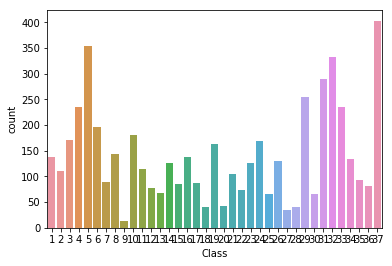

In [0]:
sns.countplot(data= data, x = "Class")
plt.show()

# A Heat Map for Graphical Representation of the Data

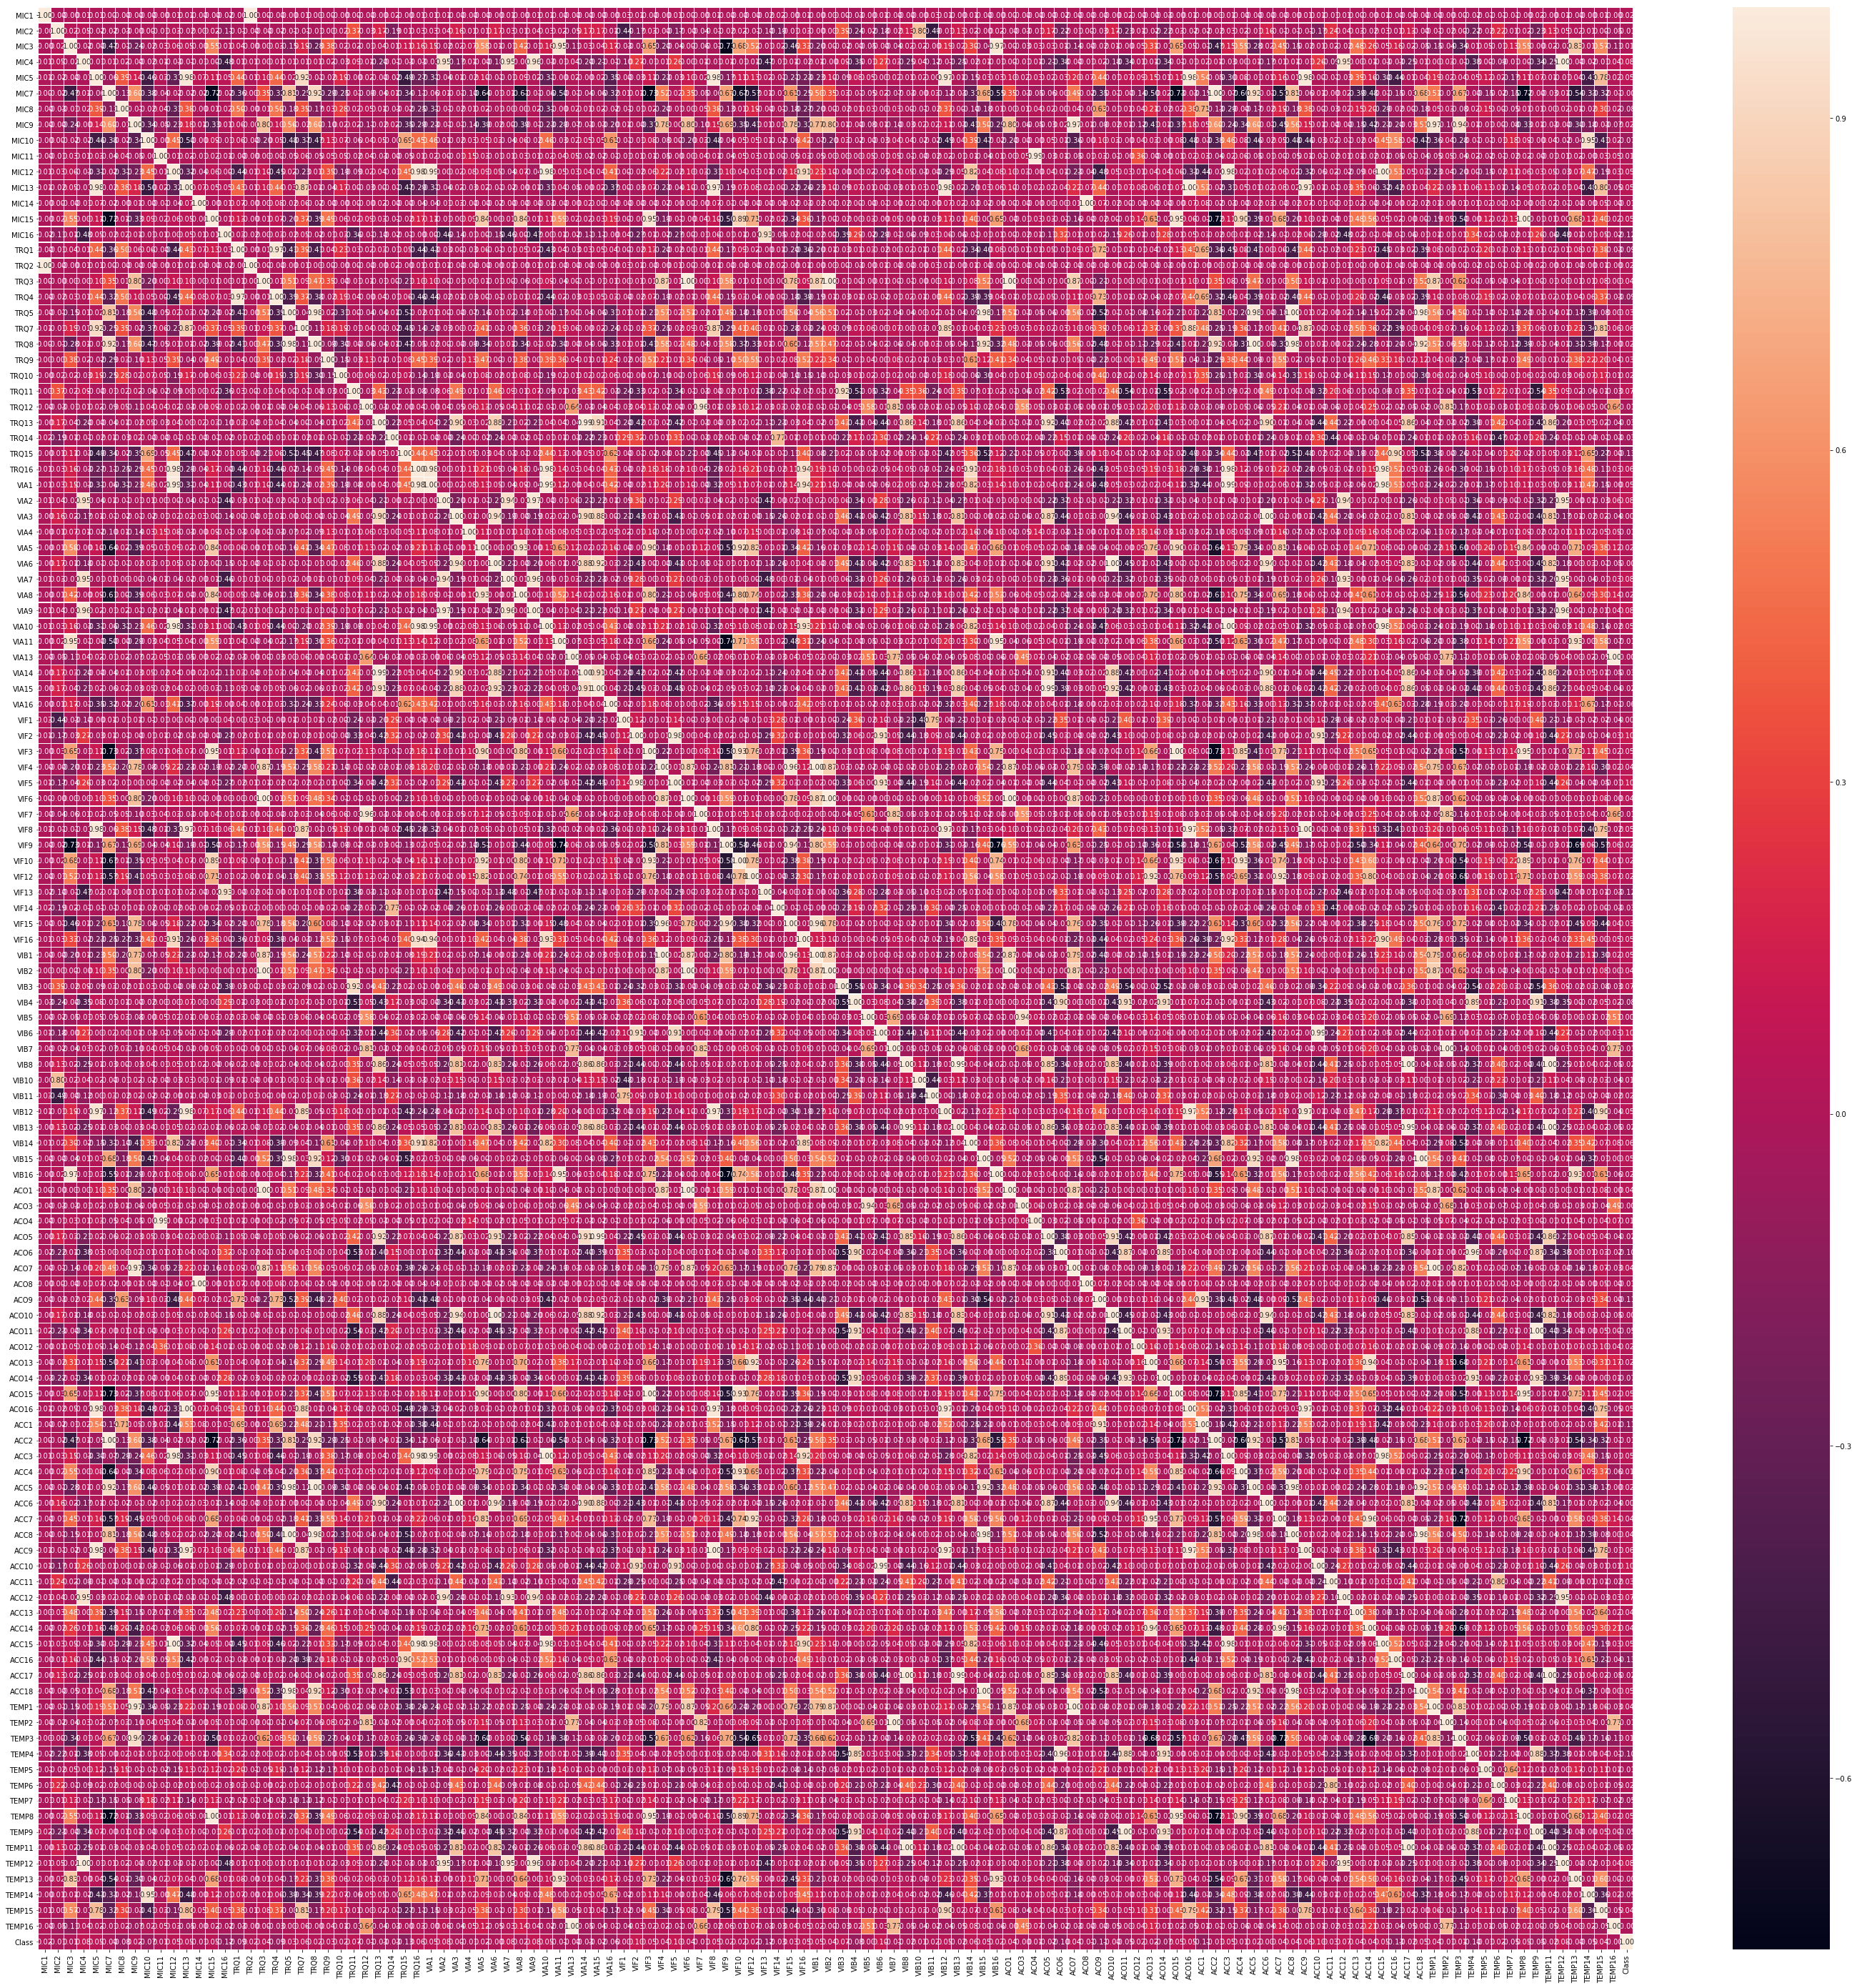

In [0]:
plt.figure(figsize = (50,50))
sns.heatmap(data = data.corr(), annot=True, linewidths=.3, fmt="1.2f")
plt.show()

# Feature Distribution Graphs

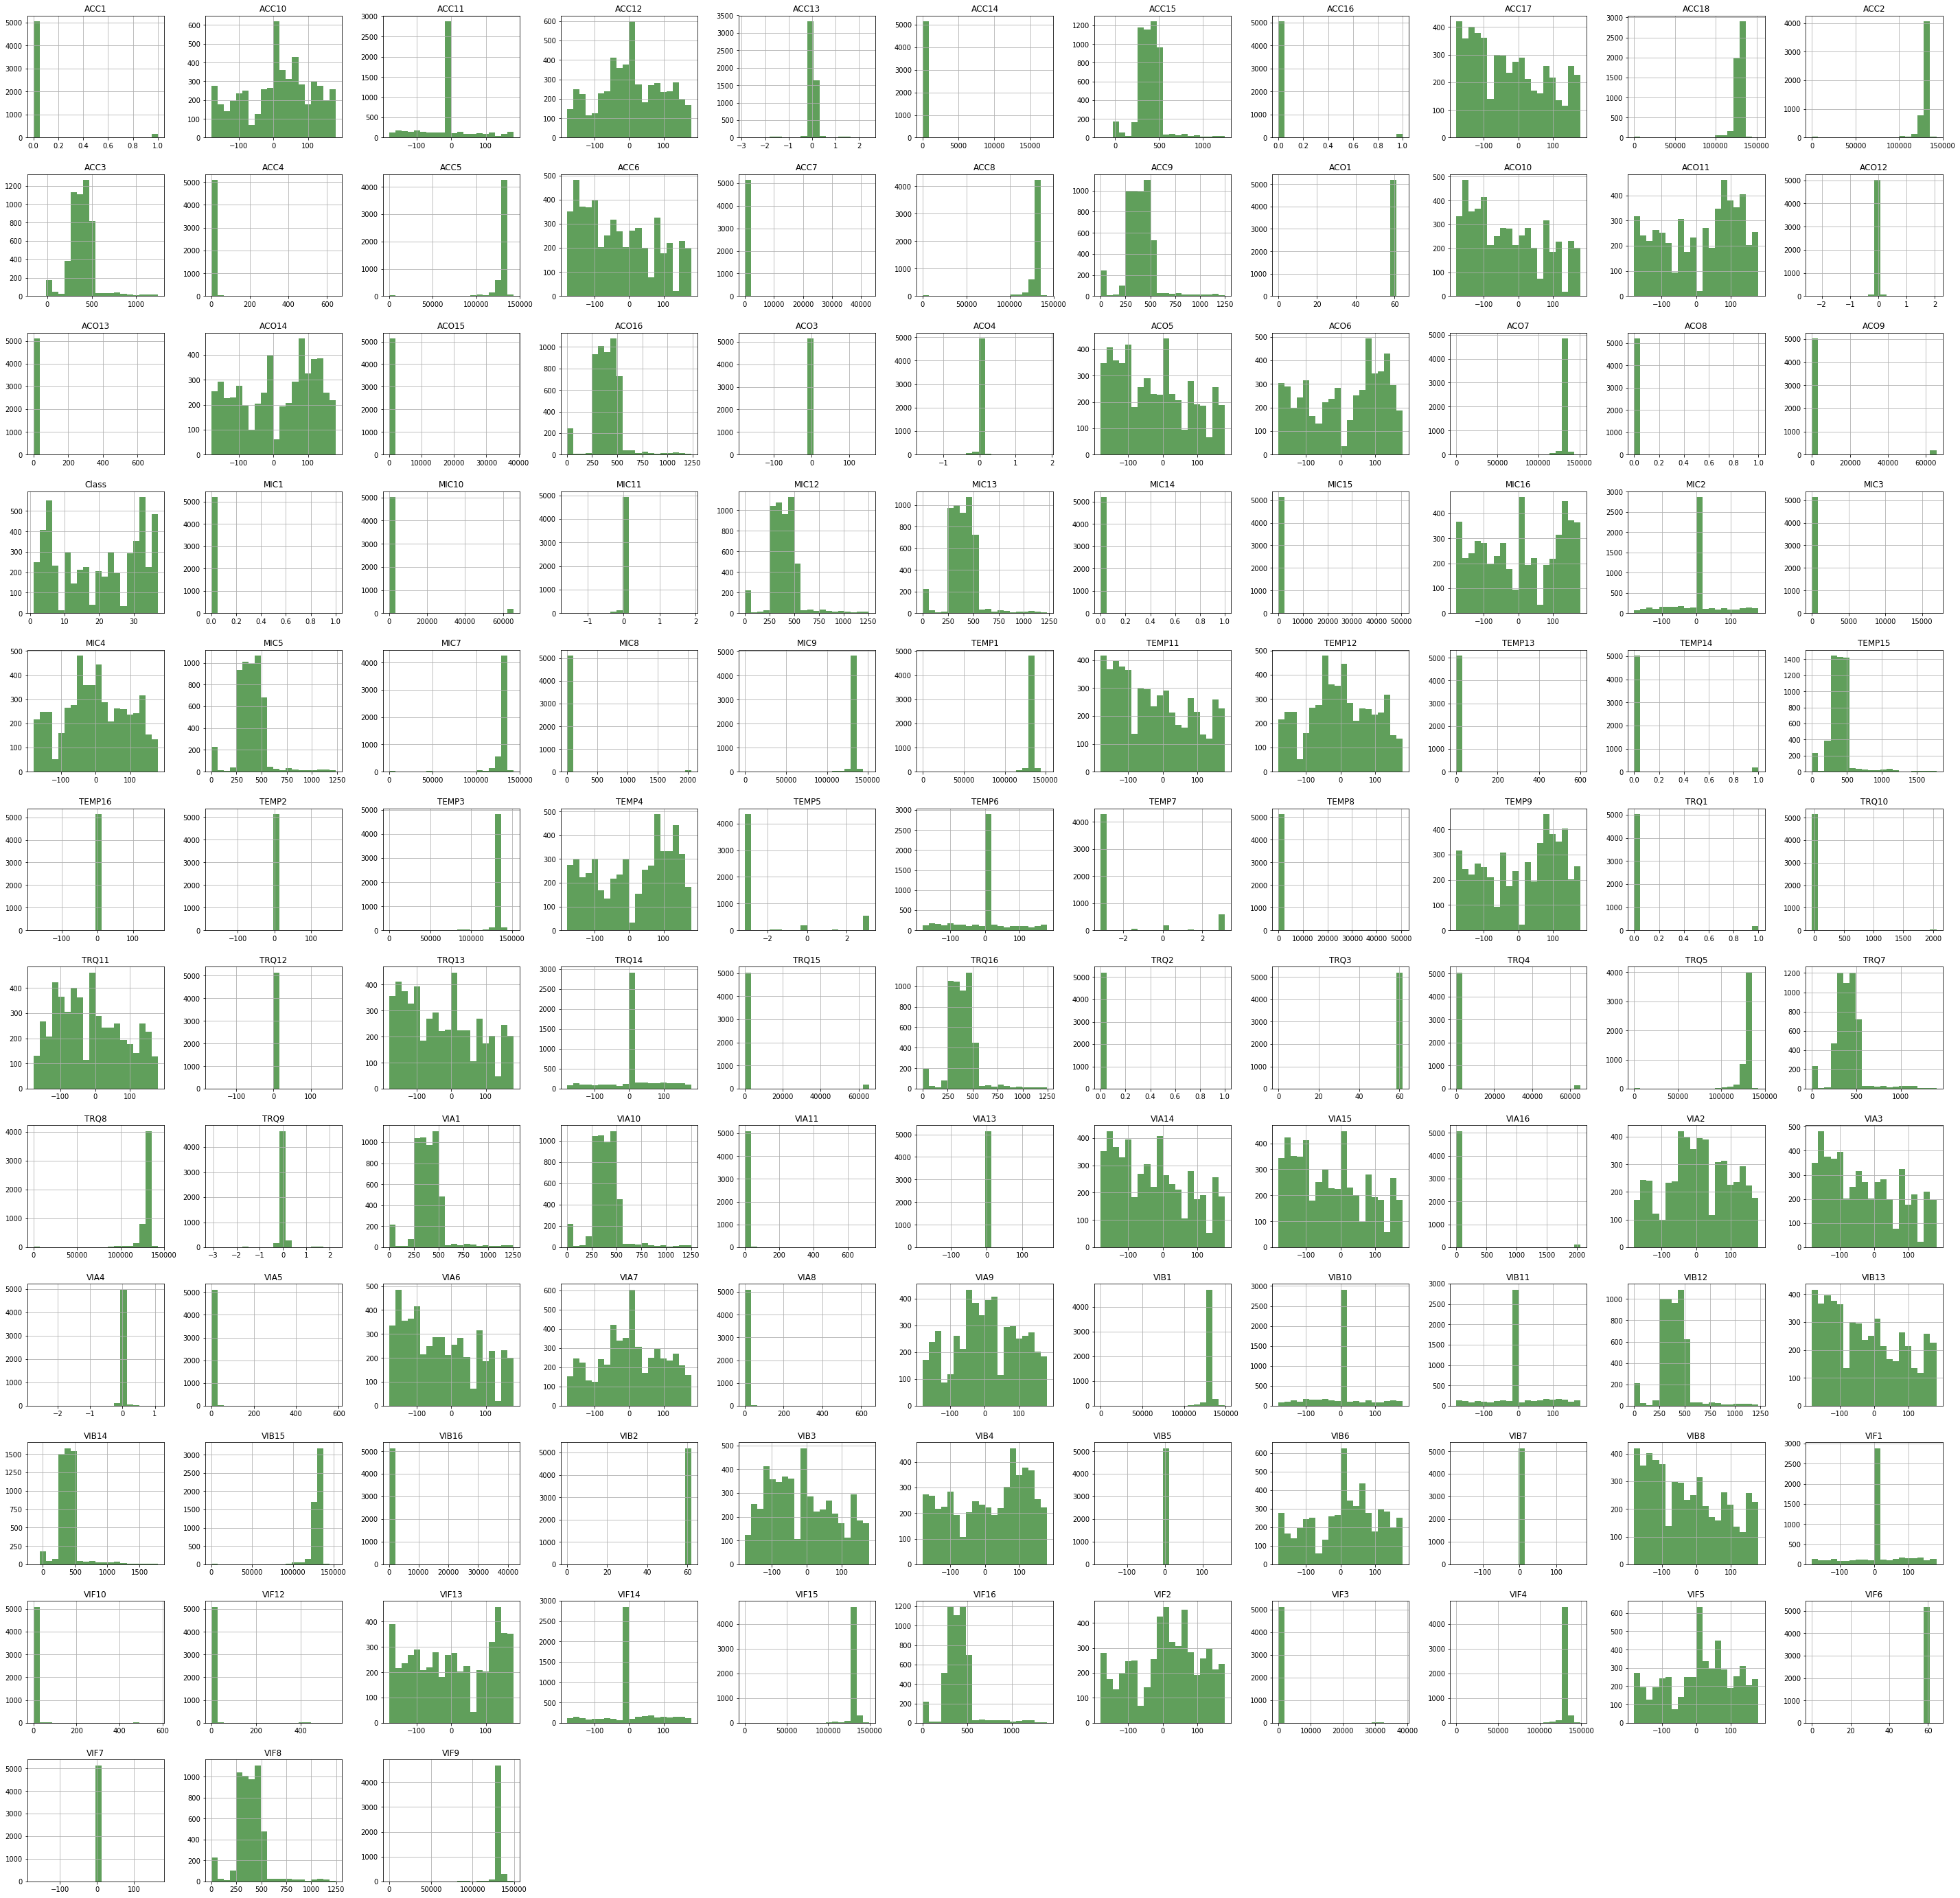

In [0]:
data.hist(figsize=(50,50),bins = 20, color="#107009AA")
plt.title("Features Distribution")
plt.show()

# Classification

In [0]:
X = data.iloc[:, 0:-1].values
y = data.iloc[:, -1].values 

In [0]:
from sklearn import preprocessing
X = preprocessing.normalize(X)
X = preprocessing.scale(X)


# Nested CV SVM

In [0]:
arry =np.logspace(1,6,num=6-1+1,base=10,dtype='int')

print(arry)

c_grid = {"C":arry}

print(c_grid)


[     10     100    1000   10000  100000 1000000]
{'C': array([     10,     100,    1000,   10000,  100000, 1000000])}


In [0]:

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, make_scorer
svr = SVC(kernel="rbf")

def classification_report_with_accuracy_score(y_true, y_pred):

    print(classification_report(y_true, y_pred)) # print classification report
    return accuracy_score(y_true, y_pred) # return accuracy score

#c_grid = {"C": [1, 10, 100, ...  ]}

inner_cv = KFold(n_splits=3, shuffle=True, random_state=0)

outer_cv = KFold(n_splits=10, shuffle=True, random_state=0)

#clf = GridSearchCV(estimator=svr, param_grid=c_grid, cv=inner_cv)
#clf.fit(X, y)
#non_nested_score = clf.best_score_

clf = GridSearchCV(estimator=svr, param_grid=c_grid, cv=inner_cv)
nested_score = cross_val_score(clf, X=X, y=y, cv=outer_cv, scoring = make_scorer(classification_report_with_accuracy_score))




print(nested_score)





              precision    recall  f1-score   support

           1       0.69      0.82      0.75        11
           2       1.00      1.00      1.00        12
           3       0.46      0.73      0.56        15
           4       0.92      0.96      0.94        23
           5       0.72      0.90      0.80        20
           6       0.91      1.00      0.95        21
           7       0.89      0.80      0.84        10
           8       0.95      0.83      0.88        23
          10       0.93      0.67      0.78        21
          11       0.92      0.86      0.89        14
          12       1.00      1.00      1.00         7
          13       1.00      1.00      1.00         9
          14       0.90      0.75      0.82        12
          15       1.00      0.67      0.80        12
          16       1.00      1.00      1.00        12
          17       1.00      0.67      0.80         6
          18       1.00      1.00      1.00         4
          19       0.71    

# Nested CV Decision Tree DT

In [0]:
arry =np.logspace(1,6,num=6-1+1,base=10,dtype='int')

print(arry)

RS_grid = {"random_state":arry}

print(RS_grid)


[     10     100    1000   10000  100000 1000000]
{'random_state': array([     10,     100,    1000,   10000,  100000, 1000000])}


In [0]:

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, make_scorer
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier() 


def classification_report_with_accuracy_score(y_true, y_pred):

    print(classification_report(y_true, y_pred)) # print classification report
    return accuracy_score(y_true, y_pred) # return accuracy score

#c_grid = {"C": [1, 10, 100, ...  ]}

inner_cv = KFold(n_splits=3, shuffle=True, random_state=0)

outer_cv = KFold(n_splits=10, shuffle=True, random_state=0)

#clf = GridSearchCV(estimator=svr, param_grid=c_grid, cv=inner_cv)
#clf.fit(X, y)
#non_nested_score = clf.best_score_

clf = GridSearchCV(estimator=DT, param_grid=RS_grid, cv=inner_cv)
nested_score = cross_val_score(clf, X=X, y=y, cv=outer_cv, scoring = make_scorer(classification_report_with_accuracy_score))




print(nested_score)





              precision    recall  f1-score   support

           1       0.78      0.64      0.70        11
           2       0.92      1.00      0.96        12
           3       0.64      0.60      0.62        15
           4       0.90      0.83      0.86        23
           5       0.85      0.85      0.85        20
           6       0.80      0.95      0.87        21
           7       0.75      0.90      0.82        10
           8       0.88      0.61      0.72        23
          10       0.93      0.62      0.74        21
          11       0.83      0.71      0.77        14
          12       0.86      0.86      0.86         7
          13       0.88      0.78      0.82         9
          14       0.60      1.00      0.75        12
          15       0.69      0.75      0.72        12
          16       0.83      0.83      0.83        12
          17       0.83      0.83      0.83         6
          18       0.57      1.00      0.73         4
          19       0.45    

# Nested CV K Nearest Neighbors KNN

In [0]:
arry =list(range(1,10))

print(arry)

n_neighbors = {"n_neighbors":arry}

print(n_neighbors)


[1, 2, 3, 4, 5, 6, 7, 8, 9]
{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]}


In [0]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, make_scorer
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors) 


def classification_report_with_accuracy_score(y_true, y_pred):

    print(classification_report(y_true, y_pred)) # print classification report
    return accuracy_score(y_true, y_pred) # return accuracy score

#c_grid = {"C": [1, 10, 100, ...  ]}

inner_cv = KFold(n_splits=3, shuffle=True, random_state=0)

outer_cv = KFold(n_splits=10, shuffle=True, random_state=0)

#clf = GridSearchCV(estimator=svr, param_grid=c_grid, cv=inner_cv)
#clf.fit(X, y)
#non_nested_score = clf.best_score_

clf = GridSearchCV(estimator=KNN, param_grid=n_neighbors, cv=inner_cv)
nested_score = cross_val_score(clf, X=X, y=y, cv=outer_cv, scoring = make_scorer(classification_report_with_accuracy_score))




print(nested_score)

              precision    recall  f1-score   support

           1       0.75      0.82      0.78        11
           2       0.86      1.00      0.92        12
           3       0.91      0.67      0.77        15
           4       0.88      0.91      0.89        23
           5       0.75      0.75      0.75        20
           6       0.86      0.90      0.88        21
           7       0.82      0.90      0.86        10
           8       1.00      0.70      0.82        23
           9       0.00      0.00      0.00         0
          10       1.00      0.62      0.76        21
          11       0.86      0.86      0.86        14
          12       0.88      1.00      0.93         7
          13       0.73      0.89      0.80         9
          14       0.73      0.92      0.81        12
          15       0.78      0.58      0.67        12
          16       0.71      1.00      0.83        12
          17       0.80      0.67      0.73         6
          18       1.00    

# Features Selection Technique with ILFS

In [0]:
data=pd.read_excel (p)
data = data.loc[:, (data != 0).any(axis=0)]
#data=data.sample(frac=0.99, random_state=99)

In [0]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
X=np.array(data.drop('Class',axis=1))
y=np.array(data['Class'])
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

l=list(indices)
print(l)
# Print the feature ranking
#print("Feature ranking:")


#for f in range(X.shape[1]):
 #   print("%d. feature %d (%f)" % (f + 1, indices[f]))
    

[89, 11, 104, 10, 4, 84, 116, 95, 3, 29, 35, 32, 30, 111, 31, 83, 38, 79, 71, 118, 117, 67, 70, 92, 106, 39, 98, 52, 59, 20, 72, 121, 62, 24, 87, 63, 80, 28, 82, 8, 73, 65, 46, 18, 94, 14, 5, 49, 56, 99, 97, 19, 43, 26, 42, 101, 60, 36, 107, 7, 108, 21, 78, 91, 110, 58, 53, 48, 102, 57, 114, 22, 100, 1, 112, 69, 113, 45, 27, 68, 40, 75, 50, 37, 54, 93, 61, 119, 86, 55, 34, 17, 85, 33, 9, 77, 105, 120, 15, 90, 44, 23, 96, 74, 2, 76, 47, 109, 64, 88, 6, 13, 103, 66, 115, 25, 51, 122, 41, 12, 81, 16, 0]


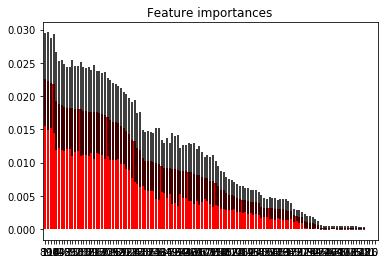

In [0]:
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

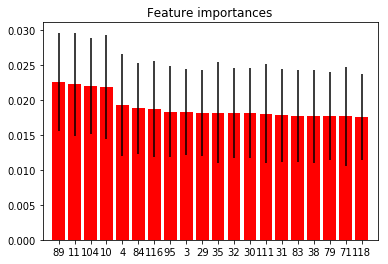

In [0]:
I = importances[indices][:20]
q=indices[:20]
plt.figure()
plt.title("Feature importances")
plt.bar(range(20), I,
    color="r", yerr=std[q], align="center")
plt.xticks(range(20), q)
plt.xlim([-1,20])
plt.show()

In [0]:
k=10

X = data.iloc[:,l[0:k]].values
y = data.iloc[:, -1].values
print(X)

[[ 4.66198060e+02  4.58324330e+02  4.19689179e+02 ...  1.64324296e+02
  -8.27522940e+01  4.21995178e+02]
 [ 2.65434265e+02  2.60931750e+02  2.59100650e+02 ...  4.60887250e+01
   1.62188415e+02  2.52325580e+02]
 [ 3.64388900e+02  3.61276030e+02  3.58388916e+02 ... -1.21616022e+02
  -6.33118400e+00  3.33234802e+02]
 ...
 [ 5.10057434e+02  5.05932930e+02  5.00988960e+02 ... -9.85200930e+01
   1.38125620e+01  4.92199680e+02]
 [ 3.45279694e+02  3.40035270e+02  3.38204170e+02 ... -1.14711880e+02
   1.29089000e-01  3.24470920e+02]
 [ 3.94052720e+02  3.86911430e+02  3.62445831e+02 ... -4.96525230e+01
   6.43259720e+01  3.66073608e+02]]


In [0]:
from sklearn import preprocessing
X = preprocessing.normalize(X)
X = preprocessing.scale(X)


# Nested CV SVM

In [0]:
arry =np.logspace(1,6,num=6-1+1,base=10,dtype='int')

print(arry)

c_grid = {"C":arry}

print(c_grid)


[     10     100    1000   10000  100000 1000000]
{'C': array([     10,     100,    1000,   10000,  100000, 1000000])}


In [0]:

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, make_scorer
svr = SVC(kernel="rbf")

def classification_report_with_accuracy_score(y_true, y_pred):

    print(classification_report(y_true, y_pred)) # print classification report
    return accuracy_score(y_true, y_pred) # return accuracy score

#c_grid = {"C": [1, 10, 100, ...  ]}

inner_cv = KFold(n_splits=3, shuffle=True, random_state=0)

outer_cv = KFold(n_splits=10, shuffle=True, random_state=0)

#clf = GridSearchCV(estimator=svr, param_grid=c_grid, cv=inner_cv)
#clf.fit(X, y)
#non_nested_score = clf.best_score_

clf = GridSearchCV(estimator=svr, param_grid=c_grid, cv=inner_cv)
nested_score = cross_val_score(clf, X=X, y=y, cv=outer_cv, scoring = make_scorer(classification_report_with_accuracy_score))




print(nested_score)





              precision    recall  f1-score   support

           1       0.73      0.73      0.73        11
           2       0.92      1.00      0.96        12
           3       0.73      0.73      0.73        15
           4       0.88      0.91      0.89        23
           5       0.77      0.85      0.81        20
           6       0.95      1.00      0.98        21
           7       0.83      1.00      0.91        10
           8       0.84      0.70      0.76        23
          10       1.00      0.90      0.95        21
          11       1.00      0.93      0.96        14
          12       1.00      0.86      0.92         7
          13       1.00      0.89      0.94         9
          14       0.86      1.00      0.92        12
          15       0.90      0.75      0.82        12
          16       0.92      1.00      0.96        12
          17       1.00      1.00      1.00         6
          18       1.00      1.00      1.00         4
          19       0.67    

# Nested CV Decision Tree DT

In [0]:
arry =np.logspace(1,6,num=6-1+1,base=10,dtype='int')

print(arry)

RS_grid = {"random_state":arry}

print(RS_grid)


[     10     100    1000   10000  100000 1000000]
{'random_state': array([     10,     100,    1000,   10000,  100000, 1000000])}


In [0]:

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, make_scorer
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier() 


def classification_report_with_accuracy_score(y_true, y_pred):

    print(classification_report(y_true, y_pred)) # print classification report
    return accuracy_score(y_true, y_pred) # return accuracy score

#c_grid = {"C": [1, 10, 100, ...  ]}

inner_cv = KFold(n_splits=3, shuffle=True, random_state=0)

outer_cv = KFold(n_splits=10, shuffle=True, random_state=0)

#clf = GridSearchCV(estimator=svr, param_grid=c_grid, cv=inner_cv)
#clf.fit(X, y)
#non_nested_score = clf.best_score_

clf = GridSearchCV(estimator=DT, param_grid=RS_grid, cv=inner_cv)
nested_score = cross_val_score(clf, X=X, y=y, cv=outer_cv, scoring = make_scorer(classification_report_with_accuracy_score))




print(nested_score)





              precision    recall  f1-score   support

           1       0.69      0.82      0.75        11
           2       0.86      1.00      0.92        12
           3       0.77      0.67      0.71        15
           4       0.96      0.96      0.96        23
           5       0.90      0.95      0.93        20
           6       0.91      1.00      0.95        21
           7       1.00      1.00      1.00        10
           8       0.94      0.74      0.83        23
           9       0.00      0.00      0.00         0
          10       0.95      0.90      0.93        21
          11       1.00      0.86      0.92        14
          12       1.00      1.00      1.00         7
          13       0.90      1.00      0.95         9
          14       0.83      0.83      0.83        12
          15       0.88      0.58      0.70        12
          16       0.79      0.92      0.85        12
          17       0.83      0.83      0.83         6
          18       1.00    

# Nested CV K Nearest Neighbors KNN

In [0]:
arry =list(range(1,10))

print(arry)

n_neighbors = {"n_neighbors":arry}

print(n_neighbors)


[1, 2, 3, 4, 5, 6, 7, 8, 9]
{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]}


In [0]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, make_scorer
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors) 


def classification_report_with_accuracy_score(y_true, y_pred):

    print(classification_report(y_true, y_pred)) # print classification report
    return accuracy_score(y_true, y_pred) # return accuracy score

#c_grid = {"C": [1, 10, 100, ...  ]}

inner_cv = KFold(n_splits=3, shuffle=True, random_state=0)

outer_cv = KFold(n_splits=10, shuffle=True, random_state=0)

#clf = GridSearchCV(estimator=svr, param_grid=c_grid, cv=inner_cv)
#clf.fit(X, y)
#non_nested_score = clf.best_score_

clf = GridSearchCV(estimator=KNN, param_grid=n_neighbors, cv=inner_cv)
nested_score = cross_val_score(clf, X=X, y=y, cv=outer_cv, scoring = make_scorer(classification_report_with_accuracy_score))




print(nested_score)

              precision    recall  f1-score   support

           1       0.78      0.64      0.70        11
           2       0.92      0.92      0.92        12
           3       0.75      0.60      0.67        15
           4       0.92      0.96      0.94        23
           5       1.00      0.90      0.95        20
           6       1.00      1.00      1.00        21
           7       0.91      1.00      0.95        10
           8       0.95      0.78      0.86        23
          10       1.00      0.86      0.92        21
          11       1.00      0.86      0.92        14
          12       1.00      0.86      0.92         7
          13       0.73      0.89      0.80         9
          14       0.92      1.00      0.96        12
          15       0.89      0.67      0.76        12
          16       0.75      1.00      0.86        12
          17       0.86      1.00      0.92         6
          18       0.67      1.00      0.80         4
          19       0.50    

# Features Selection With INFS

In [0]:
print(""+str(p))
data=pd.read_excel(p)
data = data.loc[:, (data != 0).any(axis=0)]
#data=data.sample(frac=0.99, random_state=99)

/content/drive/My Drive/AML/Datasets/Gear4.xlsx


In [0]:
XX=data

In [0]:
X = data.iloc[:, 1:-1].values
y = data.iloc[:, -1].values

from sklearn import preprocessing
X = preprocessing.normalize(X)
X = preprocessing.scale(X)

In [0]:
X_norm = MinMaxScaler().fit_transform(XX)


chi_selector = SelectKBest(chi2, k=17)
chi_selector.fit(X_norm, y)

SelectKBest(k=17, score_func=<function chi2 at 0x7f055f5cd620>)

In [0]:
chi_support = chi_selector.get_support()
chi_feature = XX.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')
chi_feature

17 selected features


['MIC8',
 'MIC10',
 'MIC16',
 'TRQ1',
 'TRQ4',
 'TRQ15',
 'VIA3',
 'VIA16',
 'VIF13',
 'ACO9',
 'ACO10',
 'ACC1',
 'ACC6',
 'ACC16',
 'TEMP7',
 'TEMP14',
 'Class']

In [0]:
X = data.loc[:,chi_feature]
X = X.iloc[:, 0:-1]
y = data.iloc[:, -1].values

print(X)
print(y)

      MIC8         MIC10       MIC16  TRQ1  ...        ACC6  ACC16     TEMP7  TEMP14
0        0      7.963578   90.114802     0  ...  164.324296      0 -3.085366       0
1        0     16.097349  -22.387391     0  ...   46.088725      0 -3.071546       0
2        0     14.726545  176.488190     0  ... -121.616022      0  3.080307       0
3        0     12.254890   18.718531     0  ...   88.894402      0 -2.945897       0
4        0     12.600368  133.046530     0  ... -155.569501      0 -3.021834       0
5        0     14.480955  160.897523     0  ... -131.470896      0 -2.981696       0
6        0     10.802845  130.245670     0  ... -158.187918      0 -3.049149       0
7        0      1.330728  144.571841     0  ... -147.588198      1  1.387060       0
8        0     12.308920  109.646304     0  ... -178.820128      0 -3.042847       0
9        0      3.578610  115.508292     1  ... -167.624533      0 -3.126553       0
10       0      8.971459   95.746977     0  ...  164.587856      

# Nested CV SVM

In [0]:
arry =np.logspace(1,6,num=6-1+1,base=10,dtype='int')

print(arry)

c_grid = {"C":arry}

print(c_grid)


[     10     100    1000   10000  100000 1000000]
{'C': array([     10,     100,    1000,   10000,  100000, 1000000])}


In [0]:

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, make_scorer
svr = SVC(kernel="rbf")

def classification_report_with_accuracy_score(y_true, y_pred):

    print(classification_report(y_true, y_pred)) # print classification report
    return accuracy_score(y_true, y_pred) # return accuracy score

#c_grid = {"C": [1, 10, 100, ...  ]}

inner_cv = KFold(n_splits=3, shuffle=True, random_state=0)

outer_cv = KFold(n_splits=10, shuffle=True, random_state=0)

#clf = GridSearchCV(estimator=svr, param_grid=c_grid, cv=inner_cv)
#clf.fit(X, y)
#non_nested_score = clf.best_score_

clf = GridSearchCV(estimator=svr, param_grid=c_grid, cv=inner_cv)
nested_score = cross_val_score(clf, X=X, y=y, cv=outer_cv, scoring = make_scorer(classification_report_with_accuracy_score))




print(nested_score)





              precision    recall  f1-score   support

           1       0.88      0.64      0.74        11
           2       1.00      0.92      0.96        12
           3       0.82      0.60      0.69        15
           4       1.00      0.96      0.98        23
           5       0.86      0.90      0.88        20
           6       1.00      0.86      0.92        21
           7       0.90      0.90      0.90        10
           8       1.00      0.61      0.76        23
          10       1.00      0.71      0.83        21
          11       1.00      0.86      0.92        14
          12       1.00      1.00      1.00         7
          13       1.00      1.00      1.00         9
          14       0.92      0.92      0.92        12
          15       1.00      0.58      0.74        12
          16       1.00      0.83      0.91        12
          17       0.80      0.67      0.73         6
          18       0.80      1.00      0.89         4
          19       1.00    

# Nested CV Decision Tree DT

In [0]:
arry =np.logspace(1,6,num=6-1+1,base=10,dtype='int')

print(arry)

RS_grid = {"random_state":arry}

print(RS_grid)


[     10     100    1000   10000  100000 1000000]
{'random_state': array([     10,     100,    1000,   10000,  100000, 1000000])}


In [0]:

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, make_scorer
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier() 


def classification_report_with_accuracy_score(y_true, y_pred):

    print(classification_report(y_true, y_pred)) # print classification report
    return accuracy_score(y_true, y_pred) # return accuracy score

#c_grid = {"C": [1, 10, 100, ...  ]}

inner_cv = KFold(n_splits=3, shuffle=True, random_state=0)

outer_cv = KFold(n_splits=10, shuffle=True, random_state=0)

#clf = GridSearchCV(estimator=svr, param_grid=c_grid, cv=inner_cv)
#clf.fit(X, y)
#non_nested_score = clf.best_score_

clf = GridSearchCV(estimator=DT, param_grid=RS_grid, cv=inner_cv)
nested_score = cross_val_score(clf, X=X, y=y, cv=outer_cv, scoring = make_scorer(classification_report_with_accuracy_score))




print(nested_score)





              precision    recall  f1-score   support

           1       0.69      0.82      0.75        11
           2       0.92      0.92      0.92        12
           3       0.67      0.80      0.73        15
           4       1.00      0.91      0.95        23
           5       0.71      0.85      0.77        20
           6       0.90      0.90      0.90        21
           7       0.58      0.70      0.64        10
           8       0.79      0.65      0.71        23
           9       0.00      0.00      0.00         0
          10       0.88      0.67      0.76        21
          11       0.92      0.86      0.89        14
          12       0.83      0.71      0.77         7
          13       0.89      0.89      0.89         9
          14       0.69      0.75      0.72        12
          15       0.70      0.58      0.64        12
          16       1.00      0.67      0.80        12
          17       1.00      0.67      0.80         6
          18       1.00    

# Nested CV K Nearest Neighbors KNN

In [0]:
arry =list(range(1,10))

print(arry)

n_neighbors = {"n_neighbors":arry}

print(n_neighbors)


[1, 2, 3, 4, 5, 6, 7, 8, 9]
{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]}


In [0]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, make_scorer
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors) 


def classification_report_with_accuracy_score(y_true, y_pred):

    print(classification_report(y_true, y_pred)) # print classification report
    return accuracy_score(y_true, y_pred) # return accuracy score

#c_grid = {"C": [1, 10, 100, ...  ]}

inner_cv = KFold(n_splits=3, shuffle=True, random_state=0)

outer_cv = KFold(n_splits=10, shuffle=True, random_state=0)

#clf = GridSearchCV(estimator=svr, param_grid=c_grid, cv=inner_cv)
#clf.fit(X, y)
#non_nested_score = clf.best_score_

clf = GridSearchCV(estimator=KNN, param_grid=n_neighbors, cv=inner_cv)
nested_score = cross_val_score(clf, X=X, y=y, cv=outer_cv, scoring = make_scorer(classification_report_with_accuracy_score))




print(nested_score)

              precision    recall  f1-score   support

           1       0.67      0.73      0.70        11
           2       1.00      1.00      1.00        12
           3       0.85      0.73      0.79        15
           4       0.92      0.96      0.94        23
           5       0.75      0.90      0.82        20
           6       0.95      0.95      0.95        21
           7       0.75      0.90      0.82        10
           8       0.85      0.74      0.79        23
          10       0.94      0.76      0.84        21
          11       1.00      0.86      0.92        14
          12       1.00      1.00      1.00         7
          13       0.90      1.00      0.95         9
          14       0.86      1.00      0.92        12
          15       1.00      0.58      0.74        12
          16       0.86      1.00      0.92        12
          17       0.75      0.50      0.60         6
          18       0.80      1.00      0.89         4
          19       0.62    

# Features Selection With  ECFS

In [0]:
data=pd.read_excel (p)
data = data.loc[:, (data != 0).any(axis=0)]
data=data.sample(frac=0.99, random_state=99)

In [0]:
data.columns[:-1]

data.columns[-1]

data.head()

MIC1        MIC2  MIC3        MIC4  ...  TEMP14     TEMP15  TEMP16  Class
3290     0   45.613170   0.0  108.745423  ...       0  503.55250     0.0     37
2383     0    0.000000   0.0  -37.147524  ...       0  257.45266     0.0     34
4898     0  -13.006142   0.0  -97.253856  ...       0  488.53748     0.0     10
3152     0  128.388383   0.0  -53.262157  ...       0  356.14895     0.0     32
4108     0  -87.610976   0.0  -32.159731  ...       0  307.99102     0.0      3

[5 rows x 124 columns]

In [0]:

import networkx as nx

G=nx.from_pandas_edgelist(data, source = data.columns, target = "Class", edge_attr=True )

data1 = nx.path_graph(G)
centrality = nx.eigenvector_centrality(data1, max_iter=3500)

print(centrality)

print("Feature Ranking")

print("  ")

#list(sorted(((v, '{:0.5f}'.format(c)) for v, c in centrality.items()), key = lambda x: x[1], reverse=True))


l=(sorted(((v, '{:0.5f}'.format(c)) for v, c in centrality.items()), key = lambda x: x[1], reverse=True))



m = (list(zip(*l)))

print(m)


f=[(str(x)) for x in l ]

#print(f)

s = [(x.split()) for x in f]

Features = [x for x in s if not isinstance(x, int)]


#print(s)
print(Features[0:10])



#rank_nodes = sorted(((v, '{:0.5f}'.format(c)) for v, c in centrality.items()), key = lambda x: x[1], reverse=True)




{'MIC1': 0.0023045317480793284, 37: 0.004607885475498742, 'MIC2': 0.006908884607535832, 34: 0.009206355457234446, 'MIC3': 0.011499128659030801, 10: 0.013786040590112635, 'MIC4': 0.01606593477549144, 32: 0.0183376632728265, 'MIC5': 0.02060008803311256, 3: 0.0228520822334298, 'MIC7': 0.025092531578055466, 'MIC8': 0.0273203355643502, 23: 0.029534408709958666, 'MIC9': 0.03173368173800275, 4: 0.03391710271709601, 'MIC10': 0.036083638153169825, 29: 0.03823227403027306, 'MIC11': 0.040362016797689484, 13: 0.04247189430090747, 'MIC12': 0.04456095665417559, 16: 0.046628277052584474, 'MIC13': 0.04867295252182867, 'MIC14': 0.050694104604020906, 'MIC15': 0.0526908799781562, 26: 0.05466245101405086, 'MIC16': 0.05660801625881392, 30: 0.058526800855142044, 'TRQ1': 0.06041805689096528, 24: 0.062281063680207, 'TRQ2': 0.06411512797465795, 8: 0.06591958410719918, 'TRQ3': 0.06769379406684223, 25: 0.06943714750628494, 'TRQ4': 0.07114906168290853, 'TRQ5': 0.072828981334364, 'TRQ7': 0.07447637849011282, 1: 0.

In [0]:
X = data.iloc[:, 1:-1].values
y = data.iloc[:, -1].values 

from sklearn import preprocessing
X = preprocessing.normalize(X)
X = preprocessing.scale(X)

# Nested CV SVM

In [0]:
arry =np.logspace(1,6,num=6-1+1,base=10,dtype='int')

print(arry)

c_grid = {"C":arry}

print(c_grid)


[     10     100    1000   10000  100000 1000000]
{'C': array([     10,     100,    1000,   10000,  100000, 1000000])}


In [0]:

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, make_scorer
svr = SVC(kernel="rbf")

def classification_report_with_accuracy_score(y_true, y_pred):

    print(classification_report(y_true, y_pred)) # print classification report
    return accuracy_score(y_true, y_pred) # return accuracy score

#c_grid = {"C": [1, 10, 100, ...  ]}

inner_cv = KFold(n_splits=3, shuffle=True, random_state=0)

outer_cv = KFold(n_splits=10, shuffle=True, random_state=0)

#clf = GridSearchCV(estimator=svr, param_grid=c_grid, cv=inner_cv)
#clf.fit(X, y)
#non_nested_score = clf.best_score_

clf = GridSearchCV(estimator=svr, param_grid=c_grid, cv=inner_cv)
nested_score = cross_val_score(clf, X=X, y=y, cv=outer_cv, scoring = make_scorer(classification_report_with_accuracy_score))




print(nested_score)





              precision    recall  f1-score   support

           1       0.85      0.85      0.85        13
           2       1.00      0.64      0.78        14
           3       0.61      0.89      0.72        19
           4       0.81      0.96      0.88        23
           5       0.84      0.93      0.89        29
           6       0.79      0.90      0.84        21
           7       0.78      0.88      0.82         8
           8       0.90      0.75      0.82        12
           9       1.00      1.00      1.00         4
          10       1.00      0.78      0.88        27
          11       0.86      0.86      0.86        14
          12       0.83      1.00      0.91         5
          13       1.00      0.83      0.91        12
          14       0.92      0.86      0.89        14
          15       1.00      1.00      1.00         6
          16       0.93      0.78      0.85        18
          17       1.00      0.78      0.88         9
          18       0.50    

# Nested CV Decision Tree DT

In [0]:
arry =np.logspace(1,6,num=6-1+1,base=10,dtype='int')

print(arry)

RS_grid = {"random_state":arry}

print(RS_grid)


[     10     100    1000   10000  100000 1000000]
{'random_state': array([     10,     100,    1000,   10000,  100000, 1000000])}


In [0]:

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, make_scorer
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier() 


def classification_report_with_accuracy_score(y_true, y_pred):

    print(classification_report(y_true, y_pred)) # print classification report
    return accuracy_score(y_true, y_pred) # return accuracy score

#c_grid = {"C": [1, 10, 100, ...  ]}

inner_cv = KFold(n_splits=3, shuffle=True, random_state=0)

outer_cv = KFold(n_splits=10, shuffle=True, random_state=0)

#clf = GridSearchCV(estimator=svr, param_grid=c_grid, cv=inner_cv)
#clf.fit(X, y)
#non_nested_score = clf.best_score_

clf = GridSearchCV(estimator=DT, param_grid=RS_grid, cv=inner_cv)
nested_score = cross_val_score(clf, X=X, y=y, cv=outer_cv, scoring = make_scorer(classification_report_with_accuracy_score))




print(nested_score)





              precision    recall  f1-score   support

           1       0.92      0.85      0.88        13
           2       1.00      0.86      0.92        14
           3       0.81      0.68      0.74        19
           4       0.81      0.96      0.88        23
           5       0.82      0.93      0.87        29
           6       0.80      0.95      0.87        21
           7       0.88      0.88      0.88         8
           8       0.60      0.50      0.55        12
           9       1.00      0.75      0.86         4
          10       0.92      0.85      0.88        27
          11       0.92      0.86      0.89        14
          12       1.00      1.00      1.00         5
          13       0.80      0.67      0.73        12
          14       0.67      0.71      0.69        14
          15       0.86      1.00      0.92         6
          16       0.86      0.67      0.75        18
          17       0.70      0.78      0.74         9
          18       0.50    

# Nested CV K Nearest Neighbors KNN

In [0]:
arry =list(range(1,10))

print(arry)

n_neighbors = {"n_neighbors":arry}

print(n_neighbors)


[1, 2, 3, 4, 5, 6, 7, 8, 9]
{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]}


In [0]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, make_scorer
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors) 


def classification_report_with_accuracy_score(y_true, y_pred):

    print(classification_report(y_true, y_pred)) # print classification report
    return accuracy_score(y_true, y_pred) # return accuracy score

#c_grid = {"C": [1, 10, 100, ...  ]}

inner_cv = KFold(n_splits=3, shuffle=True, random_state=0)

outer_cv = KFold(n_splits=10, shuffle=True, random_state=0)

#clf = GridSearchCV(estimator=svr, param_grid=c_grid, cv=inner_cv)
#clf.fit(X, y)
#non_nested_score = clf.best_score_

clf = GridSearchCV(estimator=KNN, param_grid=n_neighbors, cv=inner_cv)
nested_score = cross_val_score(clf, X=X, y=y, cv=outer_cv, scoring = make_scorer(classification_report_with_accuracy_score))




print(nested_score)

              precision    recall  f1-score   support

           1       0.77      0.77      0.77        13
           2       0.82      0.64      0.72        14
           3       0.89      0.84      0.86        19
           4       0.80      0.87      0.83        23
           5       0.83      0.86      0.85        29
           6       0.86      0.86      0.86        21
           7       0.67      0.75      0.71         8
           8       0.75      0.50      0.60        12
           9       0.75      0.75      0.75         4
          10       0.95      0.78      0.86        27
          11       0.73      0.79      0.76        14
          12       0.71      1.00      0.83         5
          13       0.91      0.83      0.87        12
          14       1.00      0.64      0.78        14
          15       0.67      1.00      0.80         6
          16       0.84      0.89      0.86        18
          17       0.88      0.78      0.82         9
          18       0.50    